all the kfold functions below is from

https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
    
---

this notebook is for kfold try on

In [34]:
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
from sklearn.metrics import confusion_matrix



In [18]:
import pandas as pd
df = pd.read_pickle('data/df_kategorik.pkl')
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day,local,burak,days_in_waiting_list_range
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,3,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0,0
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,4,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0,0
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,0,GBR,0,0,0,0,0,1,C,0,0,NaN,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0,0
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,0,GBR,1,1,0,0,0,1,A,0,0,304.0,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0,0
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,240.0,NaN,0,0,98.00,0,1,Check-Out,2015-07-03,2015,7,03,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,0.0,0,0,BEL,3,2,0,0,0,1,A,0,0,394.0,NaN,0,0,96.14,0,0,Check-Out,2017-09-06,2017,9,06,0,0,0
119386,0,0,102,2017,August,35,31,2,5,3,0.0,0,0,FRA,2,2,0,0,0,3,E,0,0,9.0,NaN,0,0,225.43,0,2,Check-Out,2017-09-07,2017,9,07,0,0,0
119387,0,0,34,2017,August,35,31,2,5,2,0.0,0,0,DEU,2,2,0,0,0,2,D,0,0,9.0,NaN,0,0,157.71,0,4,Check-Out,2017-09-07,2017,9,07,0,0,0
119388,0,0,109,2017,August,35,31,2,5,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,89.0,NaN,0,0,104.40,0,0,Check-Out,2017-09-07,2017,9,07,0,0,0


In [25]:
df.drop(['arrival_date_month','country','assigned_room_type','reservation_status','reservation_status_date','day','burak' ] , axis = 1, inplace = True)
df.drop(['company','agent'  ] , axis = 1, inplace = True)
df['children'].fillna(0, inplace=True)

In [24]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day,local,burak,days_in_waiting_list_range
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,3,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0,0
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,4,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0,0
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,0,GBR,0,0,0,0,0,1,C,0,0,NaN,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0,0
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,0,GBR,1,1,0,0,0,1,A,0,0,304.0,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0,0
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,240.0,NaN,0,0,98.00,0,1,Check-Out,2015-07-03,2015,7,03,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,0.0,0,0,BEL,3,2,0,0,0,1,A,0,0,394.0,NaN,0,0,96.14,0,0,Check-Out,2017-09-06,2017,9,06,0,0,0
119386,0,0,102,2017,August,35,31,2,5,3,0.0,0,0,FRA,2,2,0,0,0,3,E,0,0,9.0,NaN,0,0,225.43,0,2,Check-Out,2017-09-07,2017,9,07,0,0,0
119387,0,0,34,2017,August,35,31,2,5,2,0.0,0,0,DEU,2,2,0,0,0,2,D,0,0,9.0,NaN,0,0,157.71,0,4,Check-Out,2017-09-07,2017,9,07,0,0,0
119388,0,0,109,2017,August,35,31,2,5,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,89.0,NaN,0,0,104.40,0,0,Check-Out,2017-09-07,2017,9,07,0,0,0


In [26]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import RidgeClassifier

# create dataset
X, y = df.drop('is_canceled',axis=1), df[['is_canceled']]
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(scores)

Accuracy: 0.922 (0.001)
[0.92173475 0.92039258 0.92509018 0.92257361 0.9214831  0.92324469
 0.9214831  0.92173475 0.92282527 0.92282527]


In [131]:
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    #models.append(PassiveAggressiveClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreeClassifier())
    models.append(LinearSVC())
    #models.append(SVC())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    models.append(GradientBoostingClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(QuadraticDiscriminantAnalysis())
    return(models)
get_models()
print(get_models)

<function get_models at 0x0000016ED8E505E0>


In [132]:
x = get_models()
for model in x:
    # create dataset
    X, y = df.drop('is_canceled',axis=1), df[['is_canceled']]
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring="accuracy",  cv=cv, n_jobs=-1)
    print(model, 'accuracy: ',   scores)
    scores = cross_val_score(model, X, y, scoring="precision",  cv=cv, n_jobs=-1)
    print(model, 'precision:',   scores)
    scores = cross_val_score(model, X, y, scoring="recall",  cv=cv, n_jobs=-1)
    print(model, 'recall:   ',    scores)

LogisticRegression() accuracy:  [0.75614462 0.77833235 0.77006963 0.78894388 0.77342505]
LogisticRegression() precision: [0.81814407 0.84099766 0.81167883 0.79842447 0.8009735 ]
LogisticRegression() recall:    [0.44385629 0.49129197 0.49988762 0.58104766 0.50829425]
RidgeClassifier() accuracy:  [0.8458183  0.85101921 0.85005453 0.8472863  0.85160641]
RidgeClassifier() precision: [0.97325814 0.97512257 0.97214831 0.97282706 0.97360277]
RidgeClassifier() recall:    [0.60254533 0.61126921 0.61586873 0.60768885 0.61182931]
SGDClassifier() accuracy:  [0.74326818 0.75262142 0.78512709 0.38767721 0.39640131]
SGDClassifier() precision: [0.93412418 0.91117397 0.90681153 0.38871266 0.97411934]
SGDClassifier() recall:    [0.44678455 0.95219124 0.45470892 0.42007644 0.87026656]
KNeighborsClassifier() accuracy:  [0.80899253 0.81608087 0.81574532 0.81394178 0.81998155]
KNeighborsClassifier() precision: [0.79234825 0.79372497 0.80320366 0.79559915 0.79935406]
KNeighborsClassifier() recall:    [0.6600

In [7]:
x = get_models()
for model in x:
    # create dataset
    print('Resort Hotel')
    df_resort = df[df.hotel==1]
    X, y = df_resort.drop('is_canceled',axis=1), df_resort[['is_canceled']]
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring="accuracy",  cv=cv, n_jobs=-1)
    print(model, 'accuracy: ',  ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)
    scores = cross_val_score(model, X, y, scoring="precision",  cv=cv, n_jobs=-1)
    print(model, 'precision:',  ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)
    scores = cross_val_score(model, X, y, scoring="recall",  cv=cv, n_jobs=-1)
    print(model, 'recall:   ',  ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)

Resort Hotel
LogisticRegression() accuracy:  : 0.810 (0.004) [0.81186017 0.80774032 0.80571857 0.8173305  0.80671744]
LogisticRegression() precision: : 0.768 (0.007) [0.7749616  0.77361436 0.75656878 0.76744186 0.76561295]
LogisticRegression() recall:    : 0.452 (0.015) [0.45389114 0.4422133  0.44099099 0.48021828 0.44389808]
Resort Hotel
RidgeClassifier() accuracy:  : 0.876 (0.002) [0.87765293 0.87578027 0.87351729 0.87926083 0.87376701]
RidgeClassifier() precision: : 0.991 (0.002) [0.99130435 0.99287975 0.98630137 0.99122807 0.9911859 ]
RidgeClassifier() recall:    : 0.559 (0.006) [0.56410256 0.56001785 0.55135135 0.56525693 0.55297273]
Resort Hotel
SGDClassifier() accuracy:  : 0.672 (0.197) [0.72247191 0.80411985 0.78873767 0.76226745 0.2823074 ]
SGDClassifier() precision: : 0.650 (0.198) [0.71098266 0.82862903 0.2780005  0.63522618 0.79931193]
SGDClassifier() recall:    : 0.288 (0.058) [0.37696806 0.28692548 0.28198198 0.30150068 0.19400983]
Resort Hotel
PassiveAggressiveClassifier

In [8]:
x = get_models()
for model in x:
    # create dataset
    print('City Hotel')
    df_city = df[df.hotel==0]
    X, y = df_city.drop('is_canceled',axis=1),df_city[['is_canceled']]
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring="accuracy",  cv=cv, n_jobs=-1)
    print(model, 'accuracy: ',  ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)
    scores = cross_val_score(model, X, y, scoring="precision",  cv=cv, n_jobs=-1)
    print(model, 'precision:',  ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)
    scores = cross_val_score(model, X, y, scoring="recall",  cv=cv, n_jobs=-1)
    print(model, 'recall:   ',  ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)

City Hotel
LogisticRegression() accuracy:  : 0.772 (0.004) [0.77237416 0.77395314 0.77142677 0.76616978 0.77728651]
LogisticRegression() precision: : 0.815 (0.011) [0.82917466 0.79708144 0.82103201 0.81408629 0.8147071 ]
LogisticRegression() recall:    : 0.589 (0.015) [0.58107906 0.61316748 0.57414738 0.57688849 0.59823063]
City Hotel
RidgeClassifier() accuracy:  : 0.842 (0.001) [0.84248089 0.84203878 0.83951241 0.84139717 0.84303941]
RidgeClassifier() precision: : 0.959 (0.004) [0.96416722 0.96414795 0.95420708 0.95595003 0.95690236]
RidgeClassifier() recall:    : 0.649 (0.004) [0.65147213 0.64456917 0.64403167 0.65377698 0.65024405]
City Hotel
SGDClassifier() accuracy:  : 0.650 (0.106) [0.719952   0.71294133 0.70365692 0.43917383 0.6725619 ]
SGDClassifier() precision: : 0.931 (0.012) [0.928207   0.92553191 0.91451991 0.93747841 0.94941125]
SGDClassifier() recall:    : 0.516 (0.248) [0.30294425 0.37151092 0.52299026 0.98995803 0.3909396 ]
City Hotel
PassiveAggressiveClassifier() accur

In [26]:
def get_models2():
    models = list()
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    models.append(GaussianProcessClassifier())
    models.append(GradientBoostingClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(QuadraticDiscriminantAnalysis())
    return(models)
x = get_models2()
for model in x:
    # create dataset
    X, y = df.drop('is_canceled',axis=1), df[['is_canceled']]
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring="accuracy",  cv=cv, n_jobs=-1)
    print('accuracy:',model,   ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)
    scores = cross_val_score(model, X, y, scoring="precision",  cv=cv, n_jobs=-1)
    print('precision:',model,   ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)
    scores = cross_val_score(model, X, y, scoring="recall",  cv=cv, n_jobs=-1)
    print('recall:',model,   ': %.3f (%.3f)' % (mean(scores), std(scores) ) , scores)

accuracy: GaussianNB() : 0.624 (0.007) [0.63182619 0.62339569 0.62020804 0.63014848 0.61265833]
precision: GaussianNB() : 0.496 (0.007) [0.50335348 0.49369884 0.49490293 0.50254935 0.48424343]
recall: GaussianNB() : 0.862 (0.006) [0.85369974 0.86511098 0.85659699 0.86420863 0.86843611]
accuracy: AdaBoostClassifier() : 0.843 (0.002) [0.84376311 0.83977854 0.84468585 0.84380505 0.84334368]
precision: AdaBoostClassifier() : 0.849 (0.004) [0.84937636 0.84340849 0.85306511 0.85270049 0.84419692]
recall: AdaBoostClassifier() : 0.702 (0.004) [0.70559748 0.6940239  0.70532704 0.70278777 0.70232239]
accuracy: BaggingClassifier() : 0.943 (0.001) [0.94153175 0.94299975 0.94375472 0.94207701 0.94283198]
precision: BaggingClassifier() : 0.956 (0.004) [0.95297271 0.95178811 0.96224117 0.95341239 0.95905492]
recall: BaggingClassifier() : 0.886 (0.003) [0.88320757 0.89277177 0.88592942 0.88354317 0.88674065]
accuracy: RandomForestClassifier() : 0.941 (0.002) [0.9386377  0.94207701 0.94148981 0.9390571

In [11]:
burak = [84,104,101,32,99,111,109,112,117,116,101,114,32,119,97,115,32,98,111,114,110,32,116,111,32,115,111,108,118,101,32,112,114,111,98,108,101,109,115,32,116,104,97,116,32,100,105,100,32,110,111,116,32,101,120,105,115,116,32,98,101,102,111,114,101]
burak

[84,
 104,
 101,
 32,
 99,
 111,
 109,
 112,
 117,
 116,
 101,
 114,
 32,
 119,
 97,
 115,
 32,
 98,
 111,
 114,
 110,
 32,
 116,
 111,
 32,
 115,
 111,
 108,
 118,
 101,
 32,
 112,
 114,
 111,
 98,
 108,
 101,
 109,
 115,
 32,
 116,
 104,
 97,
 116,
 32,
 100,
 105,
 100,
 32,
 110,
 111,
 116,
 32,
 101,
 120,
 105,
 115,
 116,
 32,
 98,
 101,
 102,
 111,
 114,
 101]

In [16]:
import numpy as np
np.unique(burak)

array([ 32,  84,  97,  98,  99, 100, 101, 102, 104, 105, 108, 109, 110,
       111, 112, 114, 115, 116, 117, 118, 119, 120])

In [58]:
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
d_scores = []
for d in range(2,40):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, X, y, cv=kf, scoring='recall').mean()
    d_scores.append(cvs)
    print('recall for max_depth=',d,'{:.4f}'.format(cvs), end=" ")
    print('')
print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
optimal_d = d_scores.index(max(d_scores))+2   # index 0 is for d=2
print('optimal max_depth =', optimal_d)
 
 


"""""" DecisionTreeClassifier """"""

Search for optimal max_depth in DecisionTree, vary 2 to 30, using KFold(5) Cross Validation on train data
recall for max_depth= 2 0.3279 
recall for max_depth= 3 0.5913 
recall for max_depth= 4 0.3733 
recall for max_depth= 5 0.7946 
recall for max_depth= 6 0.7620 
recall for max_depth= 7 0.7870 
recall for max_depth= 8 0.7517 
recall for max_depth= 9 0.7616 
recall for max_depth= 10 0.7798 
recall for max_depth= 11 0.8102 
recall for max_depth= 12 0.8294 
recall for max_depth= 13 0.8413 
recall for max_depth= 14 0.8438 
recall for max_depth= 15 0.8586 
recall for max_depth= 16 0.8647 
recall for max_depth= 17 0.8690 
recall for max_depth= 18 0.8762 
recall for max_depth= 19 0.8806 
recall for max_depth= 20 0.8815 
recall for max_depth= 21 0.8871 
recall for max_depth= 22 0.8872 
recall for max_depth= 23 0.8919 
recall for max_depth= 24 0.8931 
recall for max_depth= 25 0.8947 
recall for max_depth= 26 0.8960 
recall for max_depth= 27 0.8970 
recal

DecisionTreeClassifier(max_depth=38)

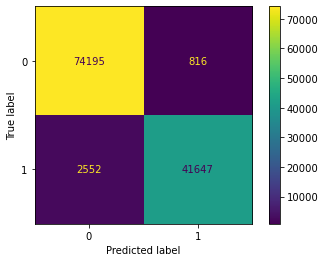

ROC AUC score =  0.9962584852095702


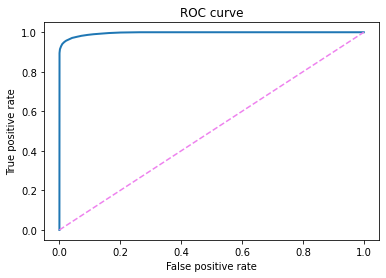

In [115]:
decisiontree = DecisionTreeClassifier(max_depth=20)
decisiontree.fit(X, y)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree, X, y)  
plt.show()  
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, decisiontree.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y, decisiontree.predict_proba(X)[:,1]))

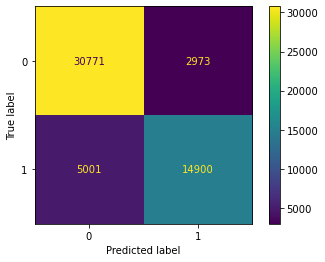

ROC AUC score =  0.9196948823894971


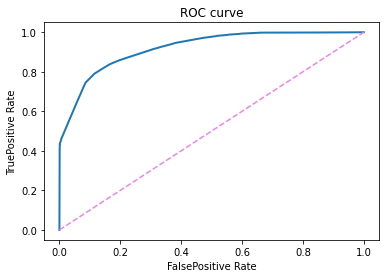

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 42)
decisiontree2 = DecisionTreeClassifier(max_depth=9)
decisiontree2.fit(X_train, y_train)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree2, X_test, y_test)  
plt.show()  
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, decisiontree2.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('FalsePositive Rate')
plt.ylabel('TruePositive Rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, decisiontree2.predict_proba(X_test)[:,1]))

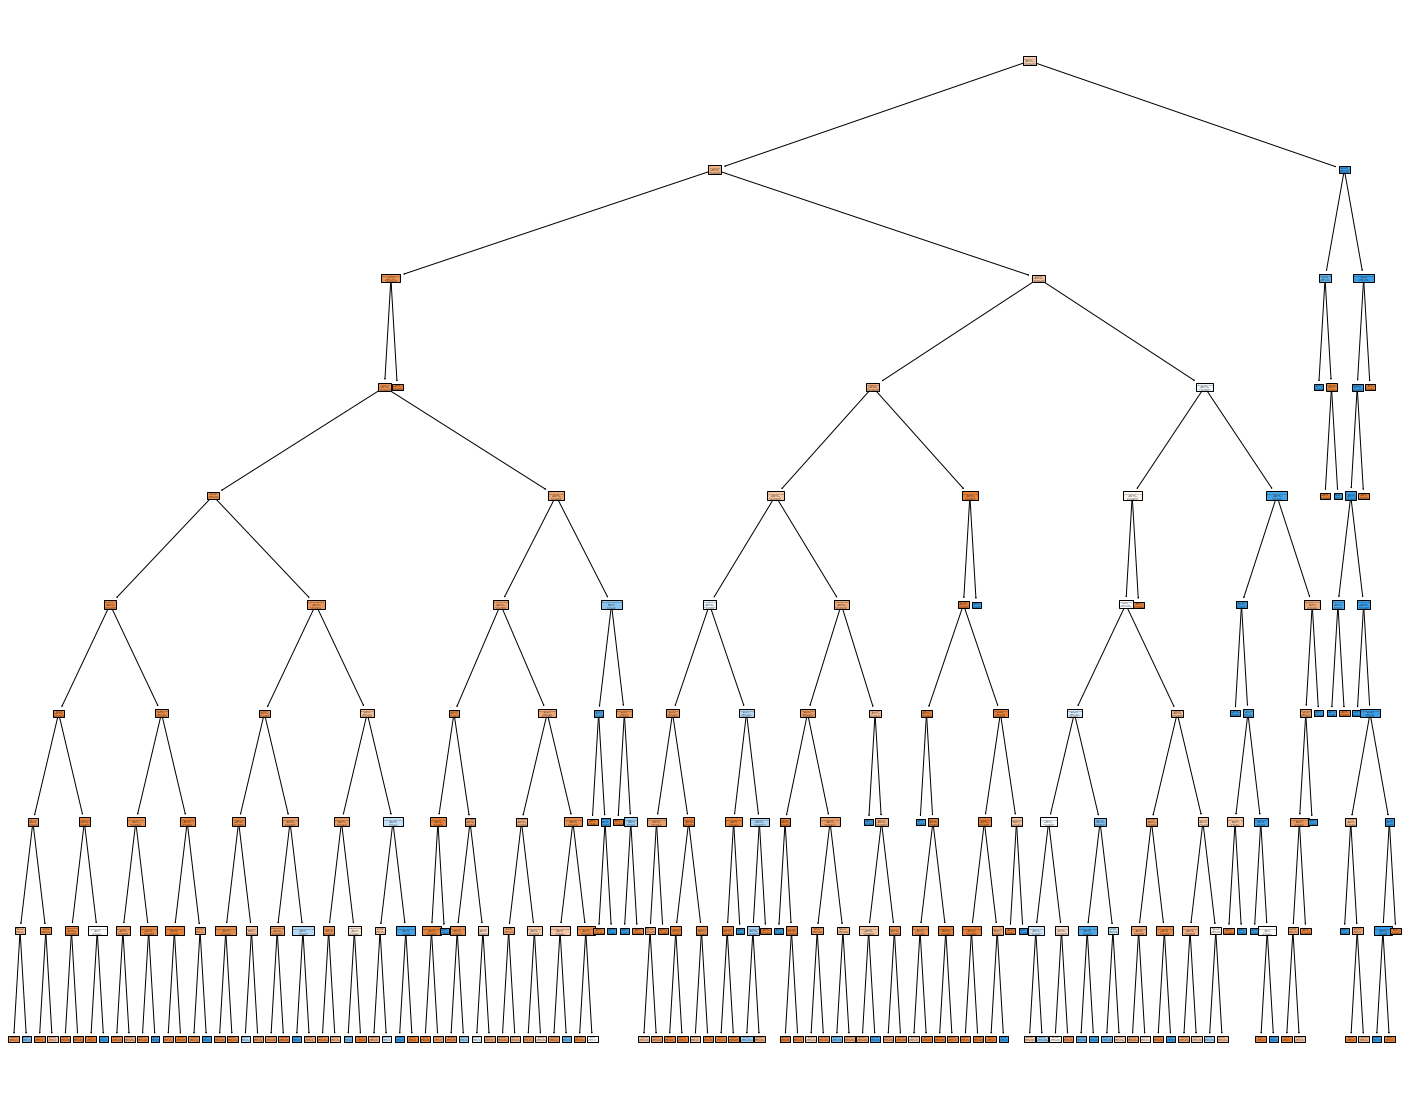

In [99]:
from sklearn import tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)
gph = get_dt_graph(decisiontree2)

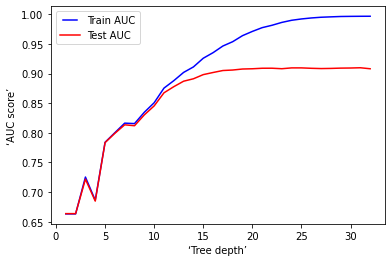

In [105]:
from sklearn.metrics import roc_curve, auc


max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘AUC score’')
plt.xlabel('‘Tree depth’')
plt.show()

<ipython-input-114-c18b7337302d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  randomtree.fit(X_train, y_train)


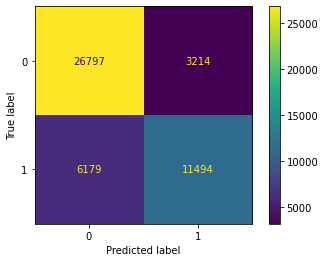

ROC AUC score =  0.8545841731699642


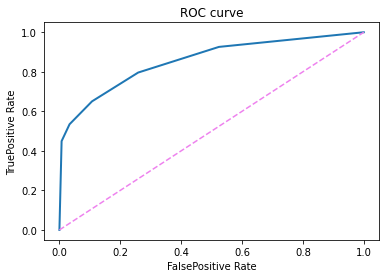

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
randomtree = KNeighborsClassifier( )
randomtree.fit(X_train, y_train)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomtree, X_test, y_test)  
plt.show()  
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, randomtree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('FalsePositive Rate')
plt.ylabel('TruePositive Rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, randomtree.predict_proba(X_test)[:,1]))

Text(0.5, 1.0, 'Feature Importance')

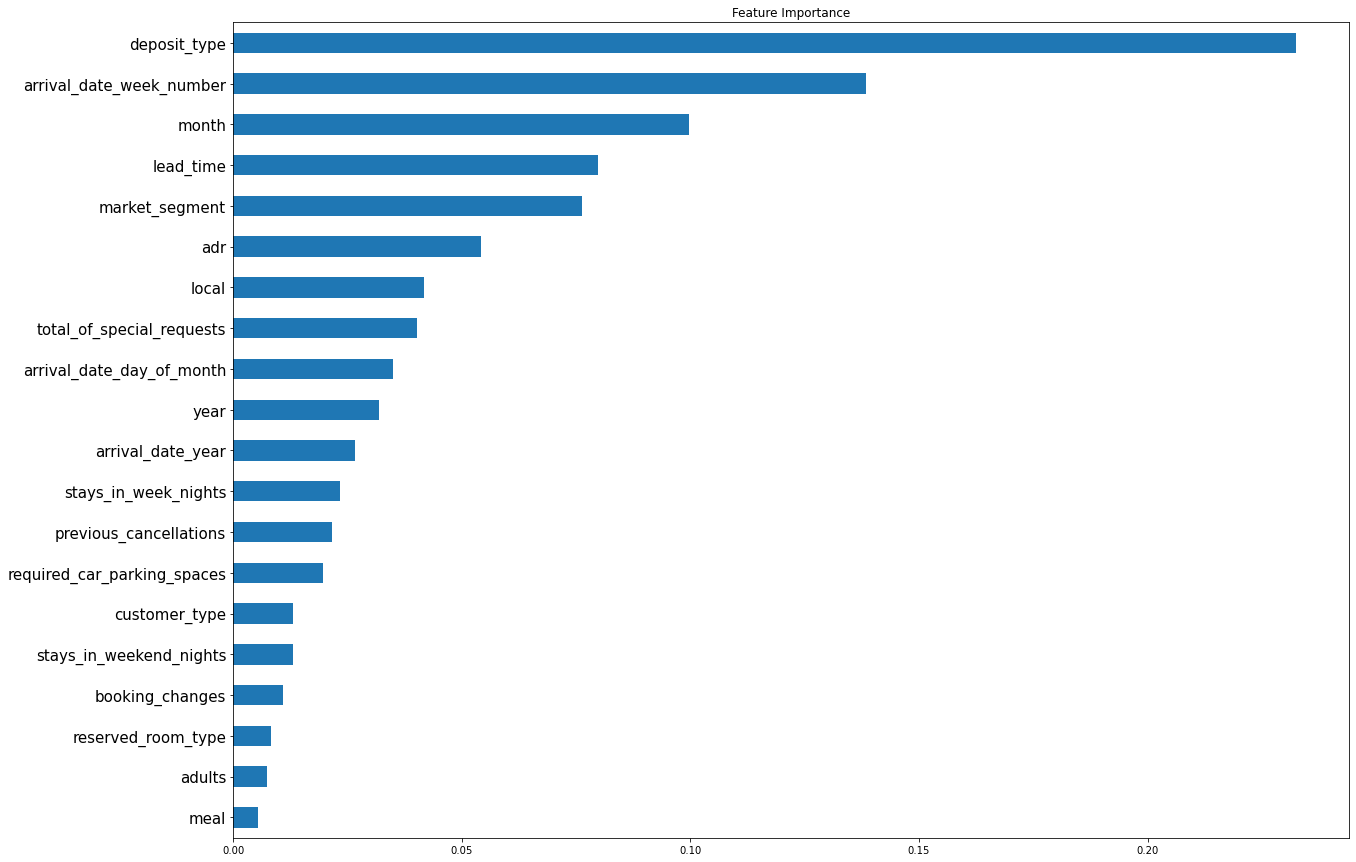

In [129]:
## To look for top features using Random Forest
# Create decision tree classifer object
rfc = DecisionTreeClassifier()

# Train model, note that NO scaling is required
model = rfc.fit(X_train, y_train)

# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(20)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Feature Importance')
